In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import Dense, Dropout, Normalization, BatchNormalization, LayerNormalization, Input

from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_parquet("../data/raw/input_dataset-2.parquet")
df.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,,,,,,
1970-12-19 09:51:44,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,operation,4.133996,1598.481390,1480.989917,...,1635.585700,1674.848803,175.758460,163.956613,146.288741,225.535170,297.780208,161.148100,NaN,NaN
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,operation,4.134078,1598.477449,1480.989528,...,1635.588478,1674.823883,175.755164,163.951680,146.284164,225.527142,297.771627,161.145094,NaN,NaN
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,operation,4.134731,1598.479316,1481.003188,...,1635.583464,1674.841318,175.764601,163.952007,146.283423,225.522291,297.777115,161.144487,NaN,NaN
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,operation,4.134270,1598.490184,1481.028827,...,1635.581384,1674.843245,175.763157,163.953924,146.283633,225.535827,297.772578,161.144037,NaN,NaN
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,operation,4.133583,1598.494073,1481.059017,...,1635.591746,1674.872300,175.760959,163.951968,146.286946,225.534231,297.774191,161.151967,NaN,NaN


In [4]:
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,...,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.068018e+06,1.068018e+06
mean,2.977542e+02,5.989380e+00,9.105910e+01,1.577165e+02,5.312681e+03,1.079521e+02,3.185047e+00,1.613279e+03,1.490365e+03,1.690256e+03,...,1.637421e+03,1.679710e+03,1.784819e+02,1.657813e+02,1.462637e+02,2.257179e+02,2.986768e+02,1.618114e+02,1.454601e-01,4.567642e-01
std,3.387414e+01,8.155810e+00,8.714153e+00,1.909088e+01,2.990343e+01,2.902935e+00,4.765675e-01,1.063794e+01,6.480423e+00,4.674528e+00,...,2.007034e+00,4.540256e+00,2.019696e+00,4.113352e+00,2.145015e-01,2.001803e-01,7.708676e-01,3.447038e-01,2.508660e-02,2.421547e-01
min,0.000000e+00,-3.811665e+01,0.000000e+00,1.353587e+02,3.621803e+03,6.264306e-01,2.402152e+00,1.522557e+03,1.425511e+03,1.665702e+03,...,1.587784e+03,1.608899e+03,1.753436e+02,1.629430e+02,1.457152e+02,2.243099e+02,2.977115e+02,1.608971e+02,5.138796e-02,1.300494e-01
25%,3.069059e+02,0.000000e+00,9.331226e+01,1.488042e+02,5.298511e+03,1.080113e+02,2.805074e+00,1.604473e+03,1.484862e+03,1.686002e+03,...,1.636916e+03,1.676754e+03,1.768119e+02,1.632180e+02,1.460956e+02,2.256090e+02,2.980816e+02,1.616467e+02,1.363742e-01,4.458940e-01
50%,3.098457e+02,6.300167e+00,9.404115e+01,1.516418e+02,5.303462e+03,1.080553e+02,3.176576e+00,1.611077e+03,1.489436e+03,1.689645e+03,...,1.637458e+03,1.677958e+03,1.783134e+02,1.642139e+02,1.463355e+02,2.257666e+02,2.985405e+02,1.618121e+02,1.467246e-01,4.788169e-01
75%,3.112799e+02,1.117088e+01,9.448438e+01,1.566876e+02,5.316882e+03,1.080889e+02,3.505450e+00,1.618607e+03,1.493730e+03,1.692938e+03,...,1.637769e+03,1.681526e+03,1.796520e+02,1.655471e+02,1.464563e+02,2.258674e+02,2.990896e+02,1.620740e+02,1.555545e-01,4.995086e-01
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,4.611985e+00,1.640510e+03,1.505455e+03,1.702324e+03,...,1.642896e+03,1.694804e+03,1.834105e+02,1.788814e+02,1.471180e+02,2.260519e+02,3.012224e+02,1.629766e+02,1.355756e+00,5.316383e+01


<AxesSubplot:>

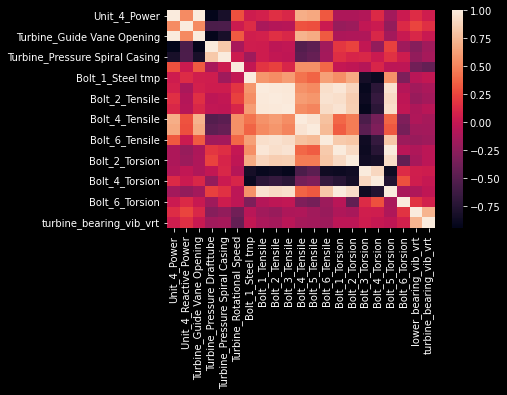

In [9]:
sns.heatmap(df.corr())

In [21]:
y_cols = df.iloc[:, 8:14]
X_cols = df.drop(columns=y_cols)

X_cols.head()


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,
1970-12-19 09:51:44,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,operation,4.133996,175.758460,163.956613,146.288741,225.535170,297.780208,161.148100,NaN,NaN
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,operation,4.134078,175.755164,163.951680,146.284164,225.527142,297.771627,161.145094,NaN,NaN
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,operation,4.134731,175.764601,163.952007,146.283423,225.522291,297.777115,161.144487,NaN,NaN
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,operation,4.134270,175.763157,163.953924,146.283633,225.535827,297.772578,161.144037,NaN,NaN
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,operation,4.133583,175.760959,163.951968,146.286946,225.534231,297.774191,161.151967,NaN,NaN


<AxesSubplot:xlabel='timepoints'>

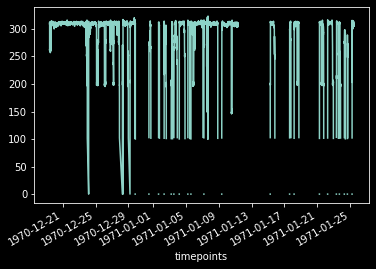

In [15]:
df["Unit_4_Power"].plot()

<AxesSubplot:xlabel='timepoints'>

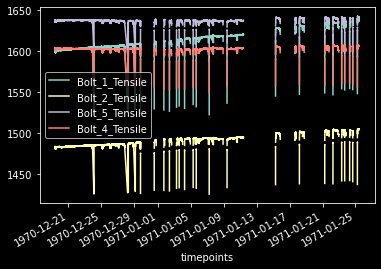

In [16]:
df[["Bolt_1_Tensile", "Bolt_2_Tensile", "Bolt_5_Tensile", "Bolt_4_Tensile"]].plot()

<AxesSubplot:xlabel='timepoints'>

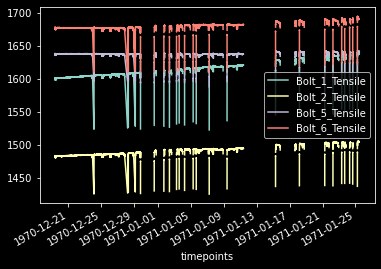

In [17]:
df[["Bolt_1_Tensile", "Bolt_2_Tensile", "Bolt_5_Tensile", "Bolt_6_Tensile"]].plot()

In [18]:
df[["Bolt_1_Tensile", "Bolt_1_Tensile","Bolt_1_Steel tmp", "Bolt_1_Torsion", "lower_bearing_vib_vrt"]].describe()

,Bolt_1_Tensile,Bolt_1_Tensile,Bolt_1_Steel tmp,Bolt_1_Torsion,lower_bearing_vib_vrt
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.068018e+06
mean,1.613279e+03,1.613279e+03,3.185047e+00,1.784819e+02,1.454601e-01
std,1.063794e+01,1.063794e+01,4.765675e-01,2.019696e+00,2.508660e-02
min,1.522557e+03,1.522557e+03,2.402152e+00,1.753436e+02,5.138796e-02
25%,1.604473e+03,1.604473e+03,2.805074e+00,1.768119e+02,1.363742e-01
50%,1.611077e+03,1.611077e+03,3.176576e+00,1.783134e+02,1.467246e-01
75%,1.618607e+03,1.618607e+03,3.505450e+00,1.796520e+02,1.555545e-01
max,1.640510e+03,1.640510e+03,4.611985e+00,1.834105e+02,1.355756e+00
